In [71]:
import pandas as pd

# URL of the raw file
url = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/refs/heads/main/OECD_PISA_data.csv'

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Descriptive

In [4]:
descriptive_stats = df.drop(columns=['index']).describe(include='all')
print(descriptive_stats)

       LOCATION INDICATOR SUBJECT         TIME        Value
count      2087      2087    2087  2087.000000  2087.000000
unique       47         3       3          NaN          NaN
top         AUS  PISAREAD     TOT          NaN          NaN
freq         54       787     701          NaN          NaN
mean        NaN       NaN     NaN  2010.814087   487.644684
std         NaN       NaN     NaN     5.317975    38.644532
min         NaN       NaN     NaN  2000.000000   348.000000
25%         NaN       NaN     NaN  2006.000000   475.000000
50%         NaN       NaN     NaN  2012.000000   495.000000
75%         NaN       NaN     NaN  2015.000000   512.000000
max         NaN       NaN     NaN  2018.000000   574.000000


# T-Test

In [16]:
from scipy import stats
# First, filter the dataset for boys and girls separately
boys_data = df[df['SUBJECT'] == 'BOY']
girls_data = df[df['SUBJECT'] == 'GIRL']

# Perform a t-test for all countries combined
t_test_all_countries = stats.ttest_ind(boys_data['Value'], girls_data['Value'], nan_policy='omit')

# Print the result for all countries combined
print(f"All Countries - T-statistic: {t_test_all_countries.statistic:.3f}, P-value: {t_test_all_countries.pvalue:.3f}")

# Now, perform a t-test for each country separately
for country in df['LOCATION'].unique():
    boys_country = boys_data[boys_data['LOCATION'] == country]['Value']
    girls_country = girls_data[girls_data['LOCATION'] == country]['Value']

    if not boys_country.empty and not girls_country.empty:
        t_stat, p_value = stats.ttest_ind(boys_country, girls_country, nan_policy='omit')
        print(f"{country} - T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


All Countries - T-statistic: -4.392, P-value: 0.000
AUS - T-statistic: -1.959, P-value: 0.058
AUT - T-statistic: -0.942, P-value: 0.354
BEL - T-statistic: -1.305, P-value: 0.201
CAN - T-statistic: -2.157, P-value: 0.038
CZE - T-statistic: -2.249, P-value: 0.031
DNK - T-statistic: -1.227, P-value: 0.228
FIN - T-statistic: -3.694, P-value: 0.001
FRA - T-statistic: -2.607, P-value: 0.013
DEU - T-statistic: -1.627, P-value: 0.113
GRC - T-statistic: -3.303, P-value: 0.002
HUN - T-statistic: -1.872, P-value: 0.070
ISL - T-statistic: -3.809, P-value: 0.001
IRL - T-statistic: -1.269, P-value: 0.213
ITA - T-statistic: -1.238, P-value: 0.224
JPN - T-statistic: -0.782, P-value: 0.440
KOR - T-statistic: -1.548, P-value: 0.131
LUX - T-statistic: -0.819, P-value: 0.418
MEX - T-statistic: -0.621, P-value: 0.539
NLD - T-statistic: -1.066, P-value: 0.294
NZL - T-statistic: -1.948, P-value: 0.060
NOR - T-statistic: -4.026, P-value: 0.000
POL - T-statistic: -2.479, P-value: 0.018
PRT - T-statistic: -1.43

In [7]:
from scipy import stats
boys_data = df[df['SUBJECT'] == 'BOY']
girls_data = df[df['SUBJECT'] == 'GIRL']
# Filter data for Australia
boys_aus = df[(df['LOCATION'] == 'AUS') & (df['SUBJECT'] == 'BOY')]['Value']
girls_aus = df[(df['LOCATION'] == 'AUS') & (df['SUBJECT'] == 'GIRL')]['Value']

# Perform a t-test for Australia
t_stat_aus, p_value_aus = stats.ttest_ind(boys_aus, girls_aus, nan_policy='omit')

# Print the result
print(f"T-test for Australia (Boys vs. Girls):\nT-statistic: {t_stat_aus}\nP-value: {p_value_aus}")

T-test for Australia (Boys vs. Girls):
T-statistic: -1.9586736428875948
P-value: 0.05839480189470024


In [34]:
# Perform a t-test between the grades in two different indicators without considering location, subject, or time

# Grouping the dataset by indicator
indicator_groups = df.groupby('INDICATOR')['Value'].apply(list)

# Selecting two specific indicators for comparison (e.g., PISAMATH vs. PISAREAD)
indicator_1 = 'PISAMATH'
indicator_2 = 'PISAREAD'

# Perform a t-test between the selected indicators
t_stat_indicator, p_value_indicator = stats.ttest_ind(indicator_groups[indicator_1], indicator_groups[indicator_2], nan_policy='omit')

# Displaying the result of the t-test between indicators
t_stat_indicator, p_value_indicator


(0.35860376333237665, 0.7199425043217846)

In [27]:
# Perform a t-test between the grades in two different locations (countries) without considering indicator or gender

# Grouping the dataset by location
location_groups = df.groupby('LOCATION')['Value'].apply(list)

# Selecting two specific countries for comparison (e.g., AUS vs. CAN for demonstration)
country_1 = 'AUS'
country_2 = 'CAN'

# Perform a t-test between the selected locations
t_stat_location, p_value_location = stats.ttest_ind(location_groups[country_1], location_groups[country_2], nan_policy='omit')

# Displaying the result of the t-test between locations
t_stat_location, p_value_location


(-4.880641298809999, 3.750393565255643e-06)

In [29]:
# Perform a t-test between the grades in two different time periods without considering location, indicator, or gender

# Grouping the dataset by time
time_groups = df.groupby('TIME')['Value'].apply(list)

# Selecting two specific time periods for comparison (e.g., 2003 vs. 2018 for demonstration)
time_1 = 2003
time_2 = 2018

# Perform a t-test between the selected time periods
t_stat_time, p_value_time = stats.ttest_ind(time_groups[time_1], time_groups[time_2], nan_policy='omit')

# Displaying the result of the t-test between time periods
t_stat_time, p_value_time


(1.8532376562927377, 0.06436396044340224)

In [31]:
# Perform a t-test between the grades in two different subjects without considering location, indicator, or time

# Grouping the dataset by subject
subject_groups = df.groupby('SUBJECT')['Value'].apply(list)

# Selecting two specific subjects for comparison (e.g., Boys vs. Girls)
subject_1 = 'BOY'
subject_2 = 'GIRL'

# Perform a t-test between the selected subjects
t_stat_subject, p_value_subject = stats.ttest_ind(subject_groups[subject_1], subject_groups[subject_2], nan_policy='omit')

# Displaying the result of the t-test between subjects
t_stat_subject, p_value_subject


(-4.392483087070505, 1.2060055384613892e-05)

In [49]:
# Selecting a specific country, for example, 'AUS' (Australia)
country = 'AUS'

# Extracting grades for the specific country
country_grades = df[df['LOCATION'] == country]['Value']

# Performing a one-sample t-test to check if the average grade in the selected country differs from the overall mean
t_stat_country, p_value_country = stats.ttest_1samp(country_grades, overall_mean, nan_policy='omit')

# Displaying the result
t_stat_country, p_value_country

(12.735961166782786, 9.318419547421415e-18)

# Normality

In [72]:
# Importing necessary libraries for normality tests
from scipy.stats import kstest, shapiro, normaltest, anderson

# Extracting the grades for normality testing
grades = df['Value'].dropna()

# Performing the Kolmogorov-Smirnov (KS) test for normality
ks_stat, ks_p_value = kstest(grades, 'norm', args=(grades.mean(), grades.std()))

# Performing the Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = shapiro(grades)

# Performing the Jarque-Bera test for normality
jb_stat, jb_p_value = normaltest(grades)

# Performing the Anderson-Darling test for normality
anderson_result = anderson(grades, dist='norm')

# Displaying the results of all normality tests
normality_results = {
    "Kolmogorov-Smirnov Test": {"Statistic": ks_stat, "P-Value": ks_p_value},
    "Shapiro-Wilk Test": {"Statistic": shapiro_stat, "P-Value": shapiro_p_value},
    "Jarque-Bera Test": {"Statistic": jb_stat, "P-Value": jb_p_value},
    "Anderson-Darling Test": {"Statistic": anderson_result.statistic, "Critical Values": anderson_result.critical_values}
}

normality_results


{'Kolmogorov-Smirnov Test': {'Statistic': 0.1308462569970963,
  'P-Value': 1.2929042049286939e-31},
 'Shapiro-Wilk Test': {'Statistic': 0.9164359496069285,
  'P-Value': 1.764685312904791e-32},
 'Jarque-Bera Test': {'Statistic': 329.97363364657525,
  'P-Value': 2.224005550878135e-72},
 'Anderson-Darling Test': {'Statistic': 59.49976845273204,
  'Critical Values': array([0.575, 0.655, 0.785, 0.916, 1.09 ])}}

# Variance (homocedasticity) tests

In [73]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming df contains your dataset and 'Value' is the column representing the grades
# and 'LOCATION' is the categorical column to compare groups

# Prepare the data for group comparisons
grouped_data = [group['Value'].dropna() for name, group in df.groupby('LOCATION') if len(group) > 1]

# 1. Hartley's Fmax Test (Simple F-max calculation)
def hartleys_fmax(groups):
    variances = [np.var(g, ddof=1) for g in groups]
    fmax = max(variances) / min(variances)
    return fmax

# Perform Hartley's Fmax Test
fmax = hartleys_fmax(grouped_data)
print(f"Hartley's Fmax: {fmax:.2f}")

# 2. Levene’s Test for homogeneity of variances
levene_stat, levene_p_value = stats.levene(*grouped_data)
levene_message = "Homoscedasticity holds (equal variances)" if levene_p_value > 0.05 else "Homoscedasticity does not hold (unequal variances)"
print(f"Levene's Test Statistic: {levene_stat:.3f}, P-Value: {levene_p_value:.3f}")
print(levene_message)

# 3. Bartlett’s Test for homogeneity of variances
bartlett_stat, bartlett_p_value = stats.bartlett(*grouped_data)
bartlett_message = "Homoscedasticity holds (equal variances)" if bartlett_p_value > 0.05 else "Homoscedasticity does not hold (unequal variances)"
print(f"Bartlett's Test Statistic: {bartlett_stat:.3f}, P-Value: {bartlett_p_value:.3f}")
print(bartlett_message)


Hartley's Fmax: 10.64
Levene's Test Statistic: 2.773, P-Value: 0.000
Homoscedasticity does not hold (unequal variances)
Bartlett's Test Statistic: 129.428, P-Value: 0.000
Homoscedasticity does not hold (unequal variances)


# Anova

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Preparing the model with interaction terms for all factors
anova_model = ols('Value ~ C(LOCATION) + C(INDICATOR) + C(SUBJECT) + C(TIME)', data=df).fit()

# Performing the ANOVA
anova_results = sm.stats.anova_lm(anova_model, typ=2)

# Displaying the ANOVA results
anova_results

,sum_sq,df,F,PR(>F)
C(LOCATION),2.667437e+06,46.0,301.582259,0.000000e+00
C(INDICATOR),7.086962e+03,2.0,18.428908,1.170086e-08
C(SUBJECT),2.938960e+04,2.0,76.424604,9.985891e-33
C(TIME),8.718882e+03,6.0,7.557515,4.921423e-08
Residual,3.903252e+05,2030.0,NaN,NaN


# Regression

In [19]:
# Performing a multiple linear regression to predict grades based on relevant variables: Location, Indicator, Subject, and Time

# Preparing the regression model using these factors
regression_model = ols('Value ~ C(LOCATION) + C(INDICATOR) + C(SUBJECT) + C(TIME)', data=df).fit()

# Summarizing the regression results
regression_summary = regression_model.summary()

# Displaying the regression summary
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     253.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:31:02   Log-Likelihood:                -8420.1
No. Observations:                2087   AIC:                         1.695e+04
Df Residuals:                    2030   BIC:                         1.728e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     508.1813      2.492    203.906      0.000     503.294     513.069
C(LOCATION)[T.AUT]            -16.1956      2.802     -5.779      0.000     -21.691     -10.700
C(LOCATION)[T.BEL]             -5.3209      2.669     -1.994      0.046     -10.554      -0.087
C(LOCATION)[T.BRA]           -118.7281      2.669    -44.491      0.000    -123.962    -113.495
C(LOCATION)[T.CAN]             12.0528      2.669      4.517      0.000       6.819      17.286
C(LOCATION)[T.CHE]             -3.0899      2.669     -1.158      0.247      -8.323       2.144
C(LOCATION)[T.CHL]            -77.7674      2.753    -28.246      0.000     -83.167     -72.368
C(LOCATION)[T.COL]           -103.3294      3.799    -27.199      0.000    -110.780     -95.879
C(LOCATION)[T.CRI]            -95.5020      5.038    -18.955      0.000    -105.383     -85.621
C(LOCATION)[T.CZE]            -16.7122      2.669     -6.263      0.000     -21.946     -11.479
C(LOCATION)[T.DEU]             -7.7636      2.669     -2.909      0.004     -12.997      -2.530
C(LOCATION)[T.DNK]            -12.3541      2.669     -4.629      0.000     -17.588      -7.121
C(LOCATION)[T.ESP]            -28.2029      2.708    -10.415      0.000     -33.514     -22.892
C(LOCATION)[T.EST]              7.7567      2.803      2.768      0.006       2.260      13.253
C(LOCATION)[T.FIN]             21.8000      2.669      8.169      0.000      16.567      27.033
C(LOCATION)[T.FRA]            -16.0482      2.669     -6.014      0.000     -21.282     -10.815
C(LOCATION)[T.GBR]            -11.7611      2.803     -4.196      0.000     -17.258      -6.265
C(LOCATION)[T.GRC]            -50.0030      2.669    -18.738      0.000     -55.236     -44.770
C(LOCATION)[T.HKG]             20.8432      5.038      4.137      0.000      10.963      30.723
C(LOCATION)[T.HUN]            -27.6811      2.669    -10.373      0.000     -32.915     -22.448
C(LOCATION)[T.IDN]           -128.1802      2.669    -48.033      0.000    -133.414    -122.947
C(LOCATION)[T.IRL]             -4.7762      2.669     -1.790      0.074     -10.010       0.457
C(LOCATION)[T.ISL]            -22.0508      2.669     -8.263      0.000     -27.284     -16.817
C(LOCATION)[T.ISR]            -51.1847      2.753    -18.591      0.000     -56.584     -45.785
C(LOCATION)[T.ITA]            -32.6585      2.669    -12.238      0.000     -37.892     -27.425
C(LOCATION)[T.JPN]             12.5689      2.669      4.710      0.000       7.335      17.802
C(LOCATION)[T.KOR]             20.0074      2.669      7.497      0.000      14.774      25.241
C(LOCATION)[T.LTU]            -30.5020      5.038     -6.054      0.000     -40.383     -20.621
C(LOCATION)[T.LUX]            -31.0176      2.681    -11.568      0.000     -36.276     -25.759
C(LOCATION)

In [38]:
import statsmodels.api as sm

# Preparing the data
X = df['TIME']  # Independent variable (year)
y = df['Value']  # Dependent variable (grades)

# Adding a constant to the independent variable for the regression model
X = sm.add_constant(X)

# Creating the linear regression model
linear_model = sm.OLS(y, X).fit()

# Displaying the summary of the linear regression model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.918
Date:                Wed, 30 Oct 2024   Prob (F-statistic):             0.0877
Time:                        23:11:32   Log-Likelihood:                -10586.
No. Observations:                2087   AIC:                         2.118e+04
Df Residuals:                    2085   BIC:                         2.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1033.9350    319.785      3.233      0.0

In [ ]:
# Example 1: Simple Linear Regression to analyze effect of a specific country (Australia)
pisa_data['AUS'] = (pisa_data['LOCATION'] == 'AUS').astype(int)

# Preparing the data
X_aus = pisa_data['AUS']
y_grades = pisa_data['Value']

# Adding a constant to the independent variable
X_aus = sm.add_constant(X_aus)

# Creating and fitting the model
model_aus = sm.OLS(y_grades, X_aus).fit()

# Displaying the summary
print(model_aus.summary())


In [ ]:
# Example 2: Simple Linear Regression to analyze effect of being a boy or girl
pisa_data['Is_Girl'] = (pisa_data['SUBJECT'] == 'GIRL').astype(int)

# Preparing the data
X_girl = pisa_data['Is_Girl']
y_grades = pisa_data['Value']

# Adding a constant to the independent variable
X_girl = sm.add_constant(X_girl)

# Creating and fitting the model
model_girl = sm.OLS(y_grades, X_girl).fit()

# Displaying the summary
print(model_girl.summary())


In [ ]:
# Example 3: Simple Linear Regression to analyze effect of assessment type (PISAMATH)
pisa_data['Is_Math'] = (pisa_data['INDICATOR'] == 'PISAMATH').astype(int)

# Preparing the data
X_math = pisa_data['Is_Math']
y_grades = pisa_data['Value']

# Adding a constant to the independent variable
X_math = sm.add_constant(X_math)

# Creating and fitting the model
model_math = sm.OLS(y_grades, X_math).fit()

# Displaying the summary
print(model_math.summary())


# CHI-SQUARE

In [42]:
# Creating a contingency table for Location and Subject
contingency_table = pd.crosstab(df['LOCATION'], df['SUBJECT'])

# Performing the Chi-Square test of independence
chi2_result = stats.chi2_contingency(contingency_table)

# Extracting the Chi-Square statistic and p-value
chi2_stat, p_val = chi2_result[0], chi2_result[1]

# Displaying the Chi-Square test result
chi2_stat, p_val


(10.726223607451784, 1.0)

# BINOMIAL Probability

In [54]:
def factorial(n):
  fact = n
  if n == 0:
    fact = 1
  else:
    for i in range(1, n):
      fact = fact * i
  return fact
n = 100 # number of flips or experiments
p = 0.5 # Probability
results = []

for x in range(0,n+1):
  num_ = factorial(n)
  denominator = factorial(x)*factorial((n-x))
  combinations = num_/(denominator)
  P_x = combinations*(p**x)*((1-p)**(n-x))

  results.append([x, P_x])
  f = pd.concat([pd.DataFrame(results, columns=['x', 'P(x)'])])
f

,x,P(x)
0,0,7.888609e-31
1,1,7.888609e-29
2,2,3.904861e-27
3,3,1.275588e-25
4,4,3.093301e-24
...,...,...
96,96,3.093301e-24
97,97,1.275588e-25
98,98,3.904861e-27
99,99,7.888609e-29


# Poisson Probability

In [56]:
import math

n_events = 30
lambda_ = 15
results = []

for x in range(0,n_events+1):
  num_ = (math.exp(-lambda_))*(lambda_**x)
  denominator = factorial(x)
  P_x = num_/denominator
  results.append([x, P_x])
  f = pd.concat([pd.DataFrame(results, columns=['x', 'P(x)'])])
f



,x,P(x)
0,0,3.059023e-07
1,1,4.588535e-06
2,2,3.441401e-05
3,3,1.720701e-04
4,4,6.452627e-04
5,5,1.935788e-03
6,6,4.839470e-03
7,7,1.037029e-02
8,8,1.944430e-02
9,9,3.240717e-02


# Cumulative Probability

Cumulative Probability between -1.96 and 1.96: 0.9500


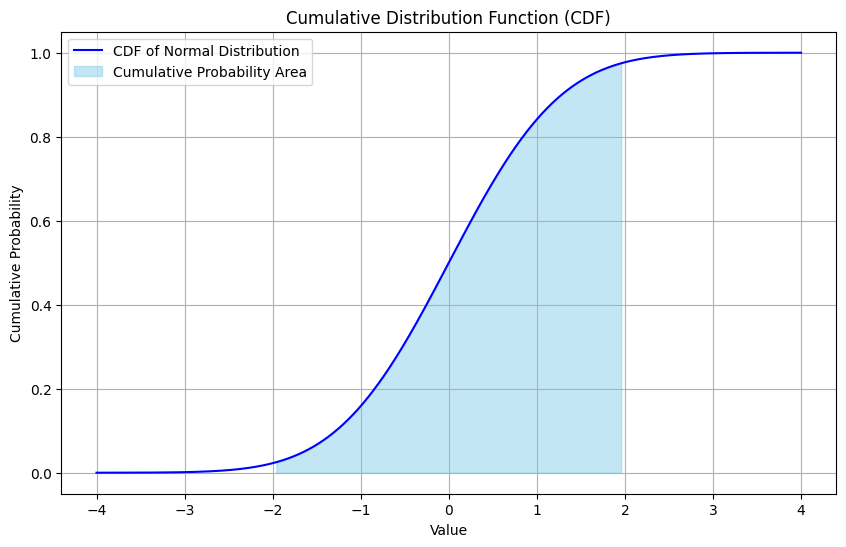

In [58]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def cumulative_probability(mean, std_dev, lower_bound, upper_bound=None):
    """
    Calculate the cumulative probability for a normal distribution.

    Parameters:
    - mean (float): The mean of the normal distribution.
    - std_dev (float): The standard deviation of the normal distribution.
    - lower_bound (float): The lower bound for calculating the cumulative probability.
    - upper_bound (float, optional): The upper bound for calculating the cumulative probability. If None, calculates up to infinity.

    Returns:
    - cumulative_prob (float): The cumulative probability within the specified bounds.
    """
    # Convert the lower and upper bounds to z-scores
    lower_z = (lower_bound - mean) / std_dev

    if upper_bound is not None:
        upper_z = (upper_bound - mean) / std_dev
        cumulative_prob = stats.norm.cdf(upper_z) - stats.norm.cdf(lower_z)
    else:
        cumulative_prob = stats.norm.cdf(lower_z)

    return cumulative_prob

# Plotting function to visualize the cumulative probability
def plot_cumulative_distribution(mean, std_dev, lower_bound, upper_bound=None):
    """
    Plot the cumulative distribution function (CDF) of a normal distribution.

    Parameters:
    - mean (float): The mean of the normal distribution.
    - std_dev (float): The standard deviation of the normal distribution.
    - lower_bound (float): The lower bound for calculating the cumulative probability.
    - upper_bound (float, optional): The upper bound for calculating the cumulative probability. If None, plots up to infinity.
    """
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = stats.norm.cdf(x, mean, std_dev)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="CDF of Normal Distribution", color='blue')

    if upper_bound is not None:
        plt.fill_between(x, 0, y, where=(x >= lower_bound) & (x <= upper_bound), color='skyblue', alpha=0.5, label='Cumulative Probability Area')
    else:
        plt.fill_between(x, 0, y, where=(x >= lower_bound), color='skyblue', alpha=0.5, label='Cumulative Probability Area')

    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Example usage with clear instructions for inputs:
if __name__ == "__main__":
    # Instructions:
    # Input the mean of the normal distribution, standard deviation, and lower & upper bounds for the calculation.

    mean = 0             # Input the mean of the normal distribution (e.g., 0)
    std_dev = 1          # Input the standard deviation of the normal distribution (e.g., 1)
    lower_bound = -1.96  # Input the lower bound for the calculation (e.g., -1.96 for standard normal)
    upper_bound = 1.96   # Input the upper bound (optional) for the calculation (e.g., 1.96 for standard normal)

    # Calculate cumulative probability
    cumulative_prob = cumulative_probability(mean, std_dev, lower_bound, upper_bound)
    print(f"Cumulative Probability between {lower_bound} and {upper_bound}: {cumulative_prob:.4f}")

    # Plot the cumulative distribution with the area
    plot_cumulative_distribution(mean, std_dev, lower_bound, upper_bound)



In [59]:
import scipy.stats as stats

def cumulative_poisson_probability(x_value, lambda_value):
    """
    Calculate the cumulative probability for a Poisson distribution.

    Parameters:
    - x_value (int): The upper limit for calculating the cumulative probability (e.g., x <= x_value).
    - lambda_value (float): The average rate (lambda) of occurrences in the Poisson distribution.

    Returns:
    - cumulative_prob (float): The cumulative probability P(X <= x_value).
    """
    # Calculate cumulative probability using the Poisson CDF
    cumulative_prob = stats.poisson.cdf(x_value, lambda_value)
    return cumulative_prob

# Example usage based on given exercise:
if __name__ == "__main__":
    # i. x <= 8, lambda = 15
    x1, lambda1 = 8, 15
    prob1 = cumulative_poisson_probability(x1, lambda1)
    print(f"i. P(X <= {x1}) with lambda = {lambda1}: {prob1:.4f}")

    # ii. x <= 8, lambda = 10
    x2, lambda2 = 8, 10
    prob2 = cumulative_poisson_probability(x2, lambda2)
    print(f"ii. P(X <= {x2}) with lambda = {lambda2}: {prob2:.4f}")

    # iii. x <= 6, lambda = 5
    x3, lambda3 = 6, 5
    prob3 = cumulative_poisson_probability(x3, lambda3)
    print(f"iii. P(X <= {x3}) with lambda = {lambda3}: {prob3:.4f}")


i. P(X <= 8) with lambda = 15: 0.0374
ii. P(X <= 8) with lambda = 10: 0.3328
iii. P(X <= 6) with lambda = 5: 0.7622


# Sample Size

In [60]:
import math

def calculate_sample_size(population_size, confidence_level, margin_of_error, standard_deviation=0.5):
    """
    Calculate the sample size for a known population size with a finite population correction.

    Parameters:
    - population_size (int): The total size of the population.
    - confidence_level (float): The desired confidence level as a decimal (e.g., 0.95 for 95% confidence).
    - margin_of_error (float): The acceptable margin of error as a decimal (e.g., 0.05 for 5% margin of error).
    - standard_deviation (float, optional): The estimated standard deviation of the population proportion. Default is 0.5 for a conservative estimate.

    Returns:
    - sample_size (int): The calculated sample size.
    """
    # Z-scores for common confidence levels
    z_scores = {
        0.9: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }

    # Determine the Z-score based on the provided confidence level
    z_score = z_scores.get(confidence_level, 1.96)  # Default is 1.96 for 95% confidence

    # Calculate the initial sample size without finite population correction
    numerator = (z_score ** 2) * (standard_deviation * (1 - standard_deviation))
    denominator = margin_of_error ** 2
    initial_sample_size = numerator / denominator

    # Apply the finite population correction formula
    finite_correction = initial_sample_size / (1 + ((initial_sample_size - 1) / population_size))

    # Round up to ensure a whole number sample size
    sample_size = math.ceil(finite_correction)

    return sample_size

# Example usage with clear instructions for inputs:
if __name__ == "__main__":
    # Instructions:
    # Input the population size, confidence level, margin of error, and optional standard deviation.

    population_size = 10000         # Input the size of the population (e.g., 10000)
    confidence_level = 0.95         # Input the desired confidence level as a decimal (e.g., 0.95 for 95% confidence)
    margin_of_error = 0.05          # Input the acceptable margin of error as a decimal (e.g., 0.05 for 5% margin of error)
    standard_deviation = 0.5        # Input the standard deviation of the population proportion (default is 0.5 if unknown)

    # Calculate sample size
    sample_size = calculate_sample_size(population_size, confidence_level, margin_of_error, standard_deviation)
    print(f"Calculated Sample Size: {sample_size}")


Calculated Sample Size: 370


In [61]:
import math

def calculate_sample_size_unknown_population(confidence_level, margin_of_error, standard_deviation=0.5):
    """
    Calculate the sample size for an unknown population size.

    Parameters:
    - confidence_level (float): The desired confidence level as a decimal (e.g., 0.95 for 95% confidence).
    - margin_of_error (float): The acceptable margin of error as a decimal (e.g., 0.05 for 5% margin of error).
    - standard_deviation (float, optional): The estimated standard deviation of the population proportion. Default is 0.5 for a conservative estimate.

    Returns:
    - sample_size (int): The calculated sample size.
    """
    # Z-scores for common confidence levels
    z_scores = {
        0.9: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }

    # Determine the Z-score based on the provided confidence level
    z_score = z_scores.get(confidence_level, 1.96)  # Default is 1.96 for 95% confidence

    # Calculate the sample size using the formula for unknown or infinite population
    numerator = (z_score ** 2) * (standard_deviation * (1 - standard_deviation))
    denominator = margin_of_error ** 2
    initial_sample_size = numerator / denominator

    # Round up to ensure a whole number sample size
    sample_size = math.ceil(initial_sample_size)

    return sample_size

# Example usage with clear instructions for inputs:
if __name__ == "__main__":
    # Instructions:
    # Input the confidence level, margin of error, and optional standard deviation.

    confidence_level = 0.95         # Input the desired confidence level as a decimal (e.g., 0.95 for 95% confidence)
    margin_of_error = 0.05          # Input the acceptable margin of error as a decimal (e.g., 0.05 for 5% margin of error)
    standard_deviation = 0.5        # Input the standard deviation of the population proportion (default is 0.5 if unknown)

    # Calculate sample size
    sample_size = calculate_sample_size_unknown_population(confidence_level, margin_of_error, standard_deviation)
    print(f"Calculated Sample Size for Unknown Population: {sample_size}")


Calculated Sample Size for Unknown Population: 385


# Z-Value Calculation

In [64]:
from scipy import stats

def find_z_value(confidence_level):
    """
    Find the Z-value for a given confidence level.

    Parameters:
    - confidence_level (float): The confidence level as a decimal (e.g., 0.95 for 95% confidence).

    Returns:
    - z_value (float): The Z-value corresponding to the given confidence level.
    """
    # Calculate the cumulative probability needed for the Z-value
    cumulative_probability = (1 + confidence_level) / 2
    z_value = stats.norm.ppf(cumulative_probability)
    return z_value

# Example usage:
confidence_level = 0.9
z_value = find_z_value(confidence_level)
print(f"Z-value for {confidence_level*100}% confidence level: {z_value:.4f}")


Z-value for 90.0% confidence level: 1.6449


In [66]:
from scipy import stats

def find_confidence_level(z_value):
    """
    Find the confidence level for a given Z-value.

    Parameters:
    - z_value (float): The Z-value.

    Returns:
    - confidence_level (float): The confidence level corresponding to the given Z-value.
    """
    # Calculate the cumulative probability for the given Z-value
    cumulative_probability = stats.norm.cdf(z_value)
    confidence_level = 2 * cumulative_probability - 1
    return confidence_level

# Example usage:
z_value = 1.6449
confidence_level = find_confidence_level(z_value)
print(f"Confidence level for Z-value {z_value}: {confidence_level*100:.2f}%")


Confidence level for Z-value 1.6449: 90.00%
